<Figure size 640x480 with 0 Axes>

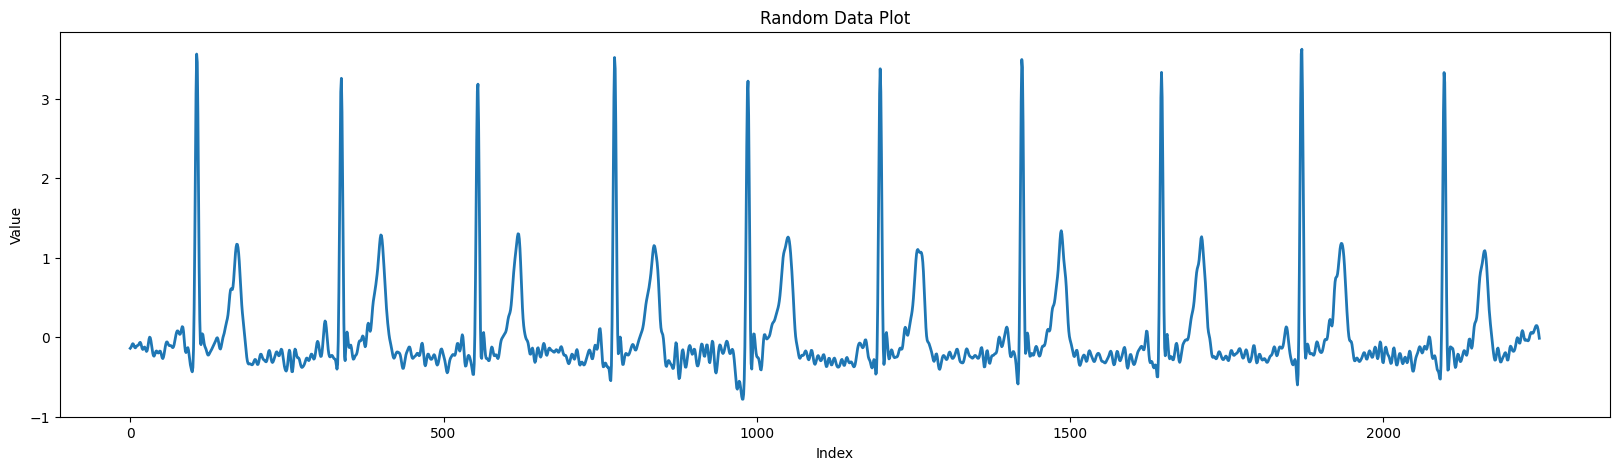

In [31]:
# data_path = '/root/data/p1-2_people2000_segmentall_sample_step100_data/index_0-42k_step:1.txt' # pretrain train_dataset
data_path = '/root/data/FocusMAE/train.txt' # pretrain val_dataset

import sys
sys.path.append('..')
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from dataset import PretrainDataset

def plot(signal, label=None):
    plt.clf()
    plt.figure(figsize=(20, 5))
    plt.plot(range(len(signal)), signal, linewidth=2, marker=None, linestyle='-')
    plt.title(label if label else "Signal Plot")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()

dataset = PretrainDataset(data_path)
random_index = random.randint(0, len(dataset) - 1)
random_data = dataset[random_index]
random_data = random_data.view(-1)
plot(random_data, label="Random Data Plot")




/tmp/ipykernel_2555447/1297537173.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt, map_location='cpu')


<Figure size 640x480 with 0 Axes>

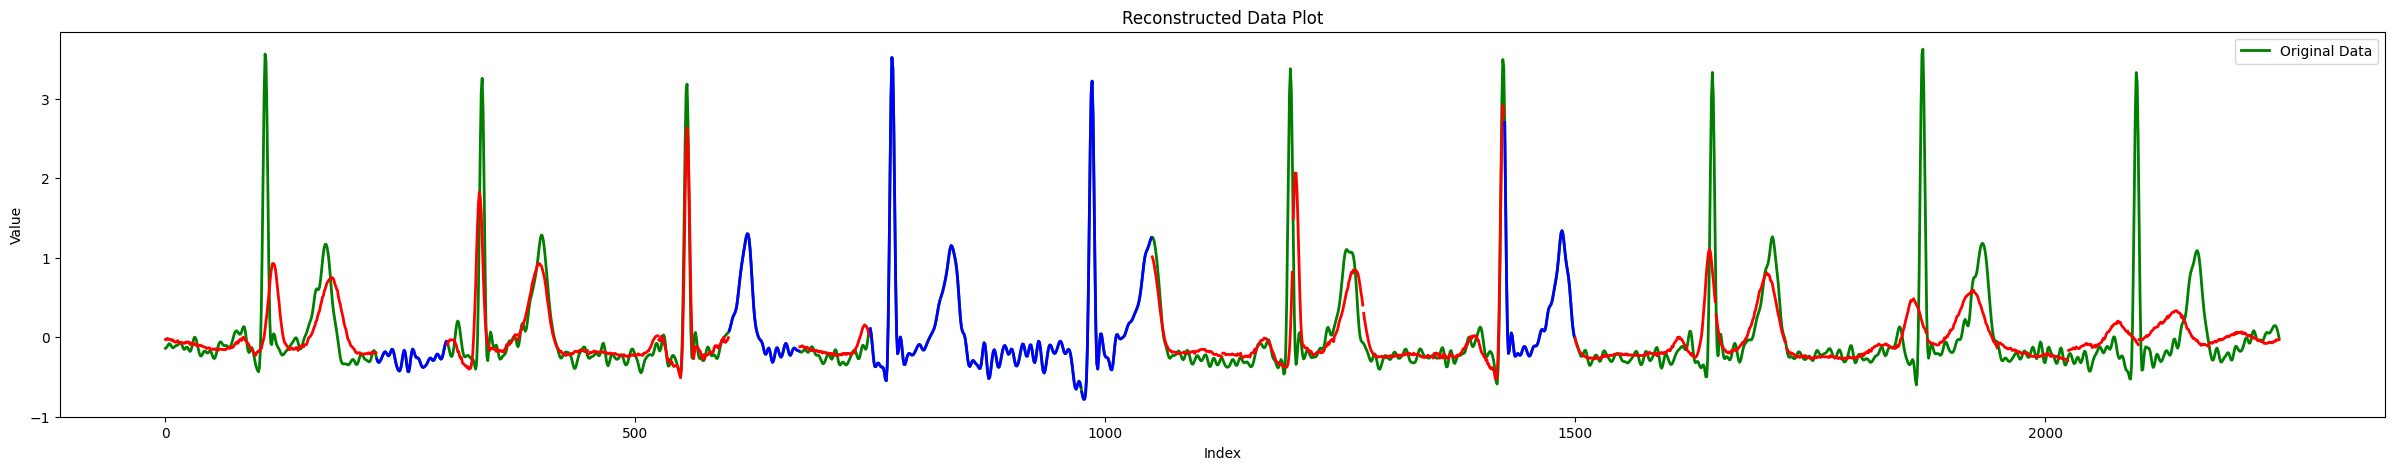

In [32]:
import os

import model.FocusMae as model_focus_mae

class args:
    task = "pretrain"
    dataset_name = "chapman_ningbo_code15"
    train_data_path = "/root/data/FocusMAE/train.txt"
    val_data_path = "/root/data/FocusMAE/val.txt"
    data_standardization = True
    device = "cuda"
    batch_size = 512
    max_epoch_num = 1000
    val_every_n_steps = 40
    early_stop_patience = 200
    learning_rate = 1e-4
    weight_decay = 0
    scheduler_patience = 10
    scheduler_factor = 0.8
    scheduler_min_lr = 1e-8
    model_name = "FocusMae"
    num_input_channels = 1
    signal_length = 2250
    patch_length = 75
    embed_dim = 768
    encoder_depth = 12
    encoder_num_heads = 12
    decoder_embed_dim = 256
    decoder_depth = 4
    decoder_num_heads = 4
    mlp_ratio = 4
    mask_ratio = 0.75
    mask_type = "period"
    use_cls_token = True
    all_encode_norm_layer = 'LayerNorm'
    norm_layer = 'LayerNorm'

model = model_focus_mae.mae_prefer_custom(args)


ckpt = "/root/ecg_ai/FocusECG/FocusECG/min_val_loss=34.49940490722656.pth"

checkpoint = torch.load(ckpt, map_location='cpu')
model.load_state_dict(checkpoint, strict=False)

reconstructed_data, mask = model.forward_reconstruction(random_data.view(1, 1, -1))
reconstructed_data = reconstructed_data.view(-1).detach()
segment_length = len(reconstructed_data) // 30

plt.clf()
plt.figure(figsize=(30, 5))

# Plot the original random data in green
plt.plot(range(len(random_data)), random_data, color='green', linewidth=2, marker=None, linestyle='-', label='Original Data')

for i in range(30):
    segment = reconstructed_data[i * segment_length:(i + 1) * segment_length]
    color = 'red' if mask[0, i] == 1 else 'blue'
    plt.plot(range(i * segment_length, (i + 1) * segment_length), segment, color=color, linewidth=2, marker=None, linestyle='-')

plt.title("Reconstructed Data Plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()
